# **Tema: Análisis de Mercado de Ropa de Tallas Extra. Parte 4**

<table class="tfo-notebook-buttons" align="left">
    <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1ijQ4b2bzkBR8L0fxwIjlBBJ9l4N2nz7h?usp=sharing#scrollTo=yzuuTJStdvqz"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Analisis:Mercado de Ropa Tallas Extra</a>
  </td>
   <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1DqTnvllOYJosrBMAQBuCyC7cB28GCsar?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Clasificador de Ropa</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Deltarios/analisis_ropa_bedu_4"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />REPOSITORIO</a>
  </td>
</table>

# **Calculadora de tallas :**
#Empleando un regresion logística multinomial.



In [ ]:
from scipy import stats # scipy - scientific python, stats - estadística
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
from sklearn.model_selection import train_test_split
#import lightgbm as lgb
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.linear_model import LogisticRegression

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/TALLAS_FINALES.csv')

In [ ]:
data1

,Pecho,Cuello,Cintura,Longitud_delantera,Altura,Peso,Talla,SEXO,Cadera
0,88.30,35.90,77.00,57.10,166.80,51.40,S,H,NaN
1,89.70,35.70,78.90,57.10,167.10,51.50,S,H,NaN
2,87.80,35.60,78.60,57.50,168.00,51.30,S,H,NaN
3,90.90,36.10,78.80,57.10,165.40,52.80,S,H,NaN
4,90.50,35.80,77.10,58.00,165.70,51.90,S,H,NaN
...,...,...,...,...,...,...,...,...,...
34995,125.77,44.62,109.21,65.09,175.08,97.13,2XL,M,129.03
34996,124.25,44.84,105.56,64.42,175.21,96.95,2XL,M,131.54
34997,122.26,44.80,100.24,63.23,175.90,97.53,2XL,M,130.75
34998,124.45,44.33,101.46,65.62,175.47,99.26,2XL,M,130.98


La clasificación de tallas se encuenta en formato de cadena, por lo que necesitamos cambiar las categorías a valores numéricos:

- 'S' = 0
- 'M' = 1
- 'L' = 2
- 'XL' = 3
- 'XXL' = 4
- '1X' = 5
- '2X' = 6
- '1XL' = 7
- '2XL' = 8

In [ ]:
for cn in range(len(data1['Talla'])):
  if data1['Talla'].iloc[cn] == 'S':
    data1['Talla'].iloc[cn] = 0
  elif data1['Talla'].iloc[cn] == 'M':
    data1['Talla'].iloc[cn] = 1
  elif data1['Talla'].iloc[cn] == 'L':
    data1['Talla'].iloc[cn] = 2
  elif data1['Talla'].iloc[cn] == 'XL':
    data1['Talla'].iloc[cn] = 3
  elif data1['Talla'].iloc[cn] == 'XXL':
    data1['Talla'].iloc[cn] = 4
  elif data1['Talla'].iloc[cn] == '1X':
    data1['Talla'].iloc[cn] = 5
  elif data1['Talla'].iloc[cn] == '2X':
    data1['Talla'].iloc[cn] = 6
  elif data1['Talla'].iloc[cn] == '1XL':
    data1['Talla'].iloc[cn] = 7
  else:
    data1['Talla'].iloc[cn] = 8


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Creamos dos modelos porque necesitamos hacer una calculadora tanto para hombres como para mujeres.
dat_hom = data1[data1['SEXO'] == 'H']
#dat_hom.drop(['Cadera'], axis=1) # Esta línea solo elimina la columna de la variables cadera de los hombres ya que solo contienen NaN#.
dat_muj = data1[data1['SEXO'] == 'M']

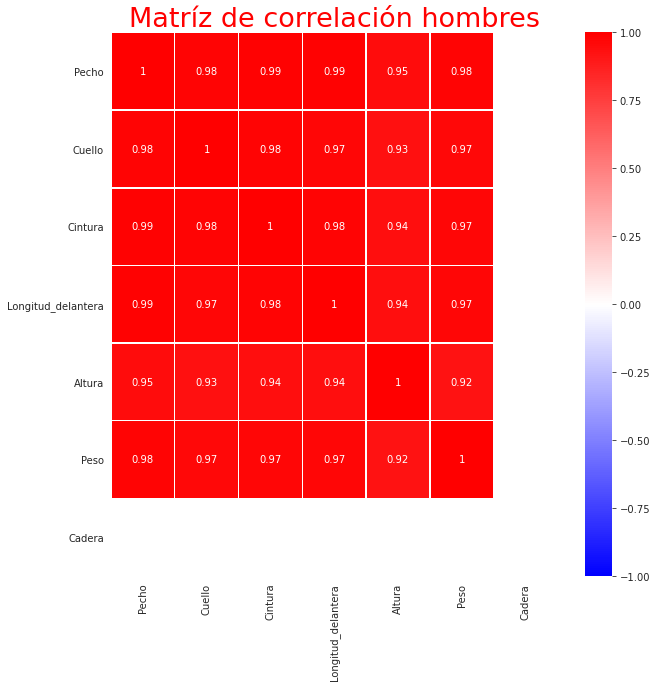

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dat_hom.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr", linewidths=.5);  sns.set_style('whitegrid');
plt.title('Matríz de correlación hombres',fontsize=27, ha="center", color='red');

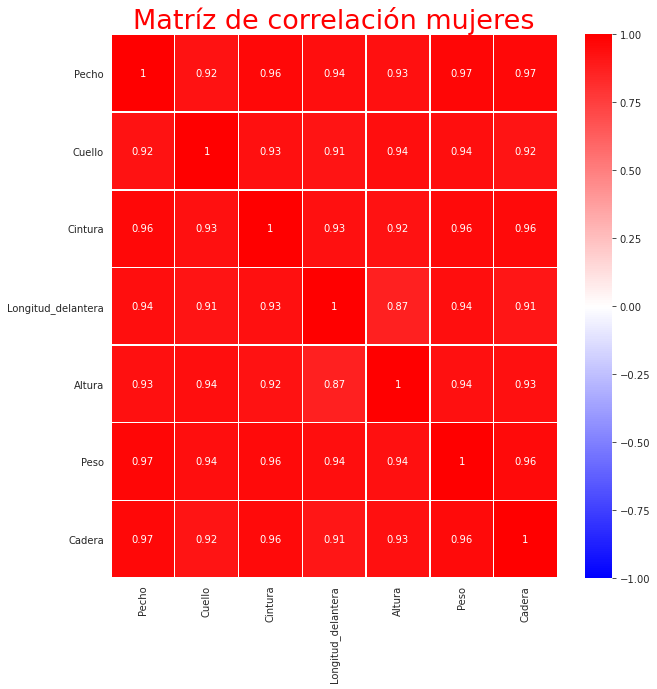

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dat_muj.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr", linewidths=.5);  sns.set_style('whitegrid');
plt.title('Matríz de correlación mujeres',fontsize=27, ha="center", color='red');

In [ ]:
# Creamos nuestros datos de prueba y nuestros datos de entrenamiento para las tallas de cada sexo.
y1 = dat_hom.Talla
y1 = y1.astype('int')
X1 = dat_hom.drop(['Talla','SEXO','Cadera'], axis=1)

y2 = dat_muj.Talla
y2 = y2.astype('int')
X2 = dat_muj.drop(['Talla','SEXO'], axis=1)

In [ ]:
# Hacer partición de training y tetsing para ambos dataframes

# Para hombres
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Para mujeres
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [ ]:
# Creamos los modelos de regresión logistica multinomial.

lr1 = LogisticRegression(multi_class="multinomial",solver ="newton-cg",max_iter= 300).fit(X_train1,y_train1)
lr2 = LogisticRegression(multi_class="multinomial",solver ="newton-cg",max_iter= 300).fit(X_train2,y_train2)

In [ ]:
preds1 = lr1.predict(X_test1)
preds2 = lr2.predict(X_test2)

In [ ]:
lr1.score(X1,y1)

1.0

In [ ]:
lr2.score(X2,y2)

1.0

In [ ]:
# Revisamos la comparación de los datos.
final_hom = X_test1.copy()
final_muj = X_test2.copy()
final_hom['Talla calculada'] = preds1
final_hom['Dato original sin predecir'] = y_test1
final_muj['Talla calculada'] = preds2
final_muj['Dato original sin predecir'] = y_test2

In [ ]:
preds1 = lr1.predict(X_test1)
preds2 = lr2.predict(X_test2)

In [ ]:
calculo_talla_hom = pd.DataFrame({'Pecho': [90],'Cuello':[35], 'Longitud_delantera': [50], 'Altura': [167.0], 'Peso': [55]})


In [ ]:
calculo_talla_hom

,Pecho,Cuello,Longitud_delantera,Altura,Peso
0,90,35,50,167.0,55


# Aquí debes escribir tus medidas de tu cuerpo para calcular tu talla, recuerda que las medidas están definidas en centímetros [cm]

In [ ]:
# Para calcular la talla de un hombre.
Tamaño_pecho = 150
Tamaño_cuello = 52
Tamaño_cintura = 132
Longitud_delantera_torso = 70
Altura_persona = 180
Peso = 90

calculo_talla_hom = pd.DataFrame({'Pecho':[90],'Cuello':[35],'Cintura':[Tamaño_cintura],'Longitud_delantera':[50],'Altura':[167],'Peso':[55]})
talla_h = lr1.predict(calculo_talla_hom)

if talla_h[0] == 0:
  talla_h_cam = 'S'
elif talla_h[0] == 1:
  talla_h_cam = 'M'
elif talla_h[0] == 2:
  talla_h_cam = 'L'
elif talla_h[0] == 3:
  talla_h_cam = 'XL'
elif talla_h[0] == 4:
  talla_h_cam = 'XXL'
elif talla_h[0] == 5:
  talla_h_cam = '1X'
elif talla_h[0] == 6:
  talla_h_cam = '2X'
elif talla_h[0] == 7:
  talla_h_cam = '1XL'
elif talla_h[0] == 8:
  talla_h_cam = '2XL'
print('Tu talla es ',talla_h_cam)

Tu talla es  L


In [ ]:
# Para calcular la talla de una mujer.
Tamaño_pecho = 87
Tamaño_cuello = 35
Tamaño_cintura = 65
Tamaño_cadera = 79
Longitud_delantera_torso = 50
Altura_persona = 162
Peso = 53

calculo_talla_muj = pd.DataFrame({'Pecho':[87],'Cuello':[35],'Cintura':[Tamaño_cintura],'Longitud_delantera':[50],'Altura':[162],'Peso':[53],'Cadera':[Tamaño_cadera]})
talla_m = lr2.predict(calculo_talla_muj)

if talla_m[0] == 0:
  talla_m_cam = 'S'
elif talla_m[0] == 1:
  talla_m_cam = 'M'
elif talla_m[0] == 2:
  talla_m_cam = 'L'
elif talla_m[0] == 3:
  talla_m_cam = 'XL'
elif talla_m[0] == 4:
  talla_m_cam = 'XXL'
elif talla_m[0] == 5:
  talla_m_cam = '1X'
elif talla_m[0] == 6:
  talla_m_cam = '2X'
elif talla_m[0] == 7:
  talla_m_cam = '1XL'
elif talla_m[0] == 8:
  talla_m_cam = '2XL'
print('Tu talla es ',talla_m_cam)

Tu talla es  S
